In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# data_url = "https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/delaney-processed.csv"
data_url = 'https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv'

In [50]:
df = pd.read_csv(data_url)
df.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolLogP             1144 non-null   float64
 1   MolWt               1144 non-null   float64
 2   NumRotatableBonds   1144 non-null   float64
 3   AromaticProportion  1144 non-null   float64
 4   logS                1144 non-null   float64
dtypes: float64(5)
memory usage: 44.8 KB


In [8]:
df.describe()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
count,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000
mean,2.449133,204.631675,2.173951,0.364932,-3.057997
std,1.866003,102.620500,2.627398,0.343305,2.096502
min,-7.571400,16.043000,0.000000,0.000000,-11.600000
25%,1.414900,122.126000,0.000000,0.000000,-4.332250
50%,2.340300,183.594500,1.000000,0.375000,-2.870500
75%,3.406475,270.715750,3.000000,0.666667,-1.600000
max,10.388600,780.949000,23.000000,1.000000,1.580000


In [9]:
df.corr(method='pearson')

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
MolLogP,1.000000,0.468097,0.205607,0.250977,-0.827959
MolWt,0.468097,1.000000,0.394219,0.098855,-0.637324
NumRotatableBonds,0.205607,0.394219,1.000000,-0.296737,-0.238508
AromaticProportion,0.250977,0.098855,-0.296737,1.000000,-0.268108
logS,-0.827959,-0.637324,-0.238508,-0.268108,1.000000


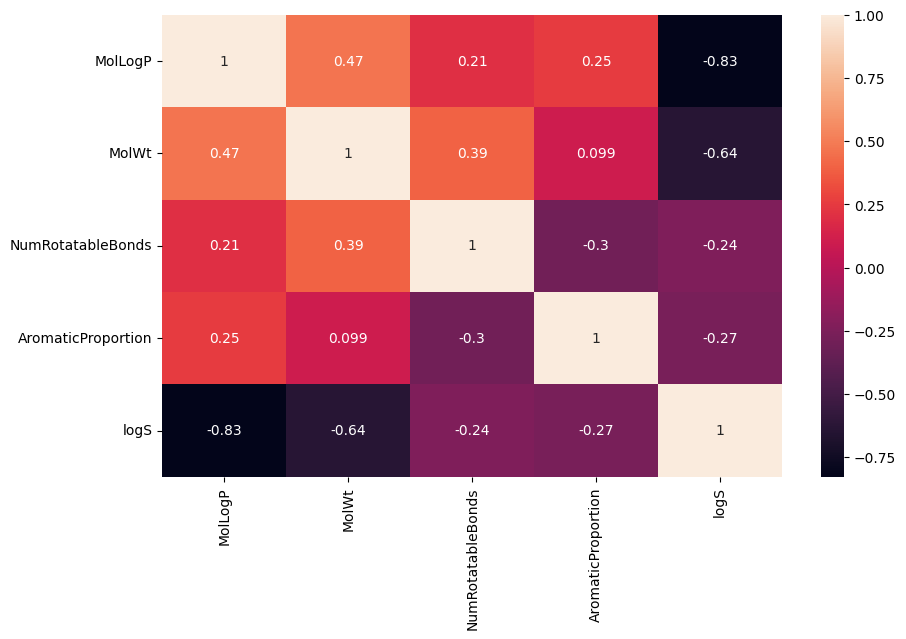

In [10]:
plt.figure(figsize=(10,6))
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [25]:
df.skew()

MolLogP              -0.012982
MolWt                 0.890477
NumRotatableBonds     2.158178
AromaticProportion    0.226302
logS                 -0.484590
dtype: float64

array([[<Axes: title={'center': 'MolLogP'}>,
        <Axes: title={'center': 'MolWt'}>],
       [<Axes: title={'center': 'NumRotatableBonds'}>,
        <Axes: title={'center': 'AromaticProportion'}>],
       [<Axes: title={'center': 'logS'}>, <Axes: >]], dtype=object)

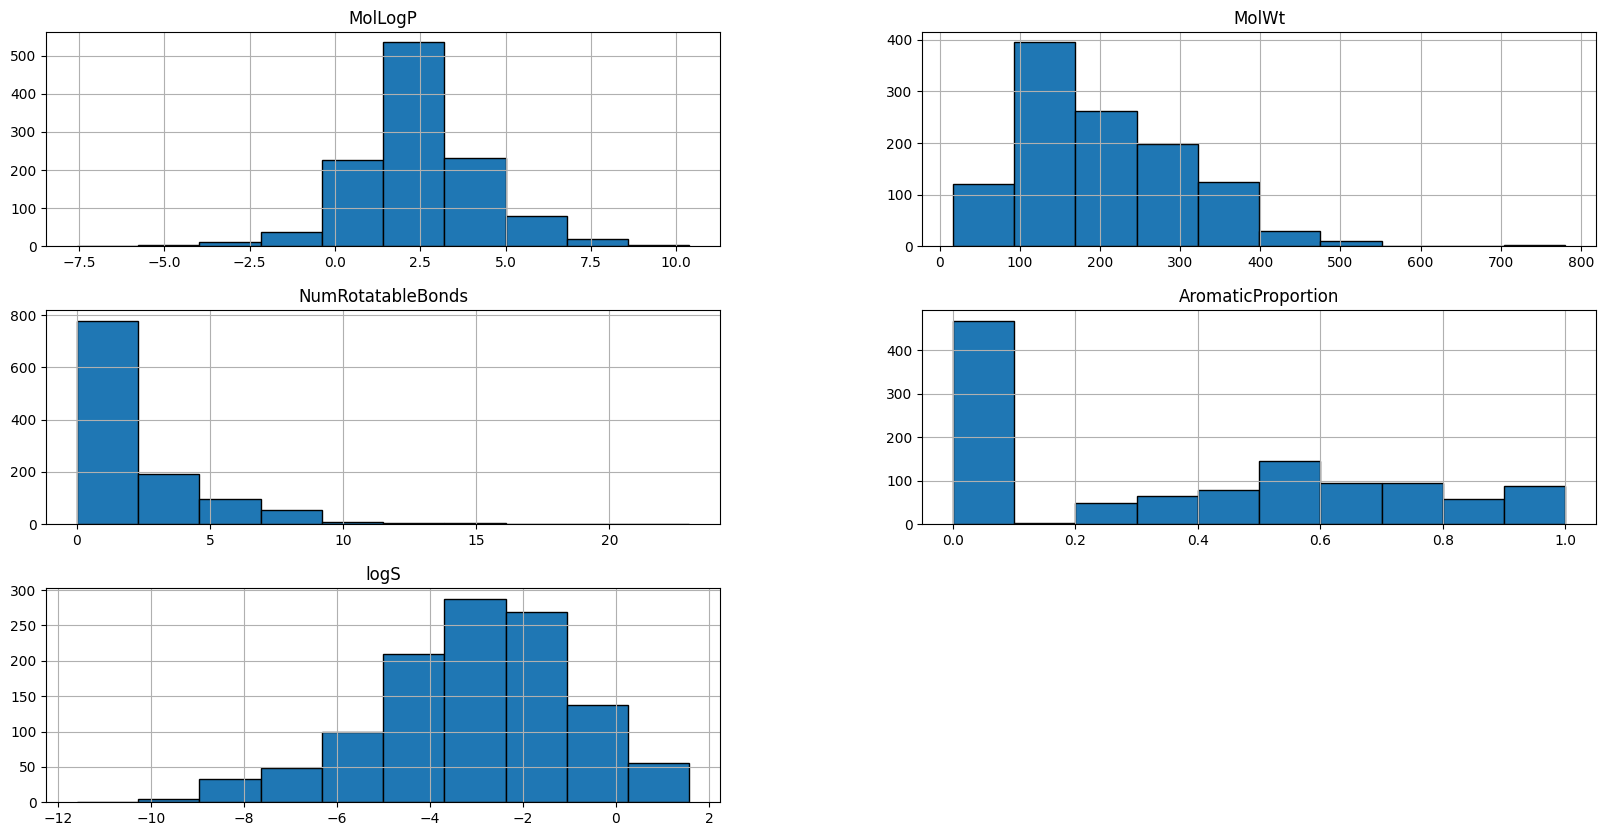

In [12]:
df.hist(figsize=(20,10), edgecolor='black')

In [60]:
X = df.drop(columns=['logS'])
x = X["MolLogP"]
y = df['logS']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123, shuffle=True)

x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

((915, 1), (229, 1), (915, 1), (229, 1))

In [61]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# The coefficients
print("Coefficient(s): \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient(s): 
 [[-0.94295882]]
Mean squared error: 1.53
Coefficient of determination: 0.66


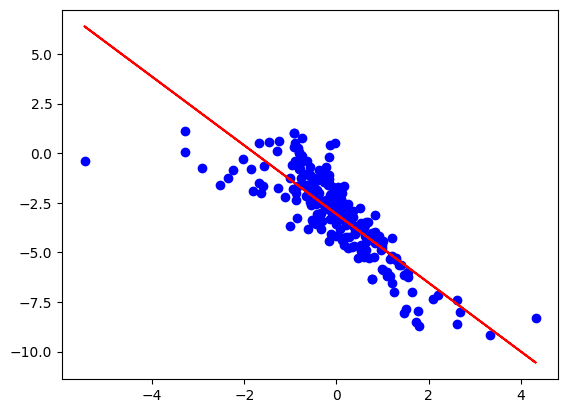

In [59]:
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, y_pred, color='red')

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, shuffle=True)

multi_class_model = LinearRegression()
multi_class_model.fit(x_train, y_train)
y_pred = multi_class_model.predict(x_test)

# The coefficients
print("Coefficient(s): \n", multi_class_model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient(s): 
 [-0.73942374 -0.00649303 -0.00620598 -0.4886557 ]
Mean squared error: 1.13
Coefficient of determination: 0.75
